In [2]:
import time
import copy
import numpy as np
from skimage.filters import gaussian
import cv2 

import matplotlib.pyplot as plt
import pylab as pl



%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave
import pickle
import bobsegutils as bsu

from skimage.draw import circle

import csv

from skimage import io

Populating the interactive namespace from numpy and matplotlib


/Users/prakash/anaconda/envs/Py35forBobSeg/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imsave', 'copy', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
filename = '/Users/prakash/Git-repos//2018-04-17_fromMark/MAX_20180417_NMY-2_speed-test-01-05_MYOSIN_ALONE_copy.tif'
myosin_channel = imread(filename)
print('Shape of stack:', myosin_channel.shape)
sigma = [0.,2,2]
myosin_channel_smooth = gaussian(myosin_channel,sigma)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/prakash/Dropbox/2018-04-17_fromMark/MAX_20180417_NMY-2_speed-test-01-05_MYOSIN_ALONE_copy.tif'

In [3]:
flows = bsu.compute_flow( myosin_channel )
flow_x, flow_y = bsu.split_flow_components( flows )
avg_flow_x = bsu.flow_average(flow_x, 1)
avg_flow_y = bsu.flow_average(flow_y, 1)
total_avg_flow_x = np.average(flow_x, axis=0)
total_avg_flow_y = np.average(flow_y, axis=0)

............................... ...done!


In [4]:
# The following parameters specify the times over which myosin positions need to be tracked
which_position = (205,208) # Position of myosin being tracked
frame_from = 0
frame_to =30

### The manually tracked coordinates from Fiji are processed before plotting

In [5]:
### Read the results csv file, delete all entries which are not coordinates and write it as a new csv file
with open("/Users/prakash/Desktop/Results8th.csv","r") as source:
    rdr= csv.reader( source )
    with open("/Users/prakash/Desktop/Results8thmodified.csv","w") as result:
        wtr= csv.writer( result )
        for r in rdr:
            wtr.writerow( (r[1], r[2]) )

In [6]:
def load_file(filename):
    '''Make a list of tuples from a csv file
    '''
    fp = open(filename, 'Ur')
    data_list = []
    for line in fp:
        data_list.append(tuple((line.strip().split(','))))
    fp.close()
    return data_list

In [7]:
data_list = load_file("/Users/prakash/Desktop/Results8thmodified.csv")
datal = data_list[1:] # Ignoring the header row (first row of csv file)

# The above created list elememts rae string, we convert them to float below
new_list = []
for element in range(len(datal)):
    number_element = []
    number_element.append((float(datal[element][0])))
    number_element.append((float(datal[element][1])))
    new_list.append(tuple(number_element))
    

/Users/prakash/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


In [8]:
manual_track_list_x, manual_track_list_y = zip(*new_list) # Separate x and y coordinates in two different lists

Computing the myosin positions (calculated tracks) based on computed flow

In [9]:
def locate_position(which_position, frame_from, frame_to, avg_flow_x, avg_flow_y, datal):
    '''Tracks the position of myosin based on flows and interpoltaion and plots them. 
       It also plots the manually tracked position of the myosin for visual validation of flow. 
    '''
    #frame_from = 0
    computed_track = [which_position]
    for frame in range(frame_from, frame_to, 1):

        updated_position = bsu.update_pos(which_position, frame, avg_flow_x, avg_flow_y)
        which_position = updated_position
        computed_track.append(which_position)
        #print(which_position)
    return computed_track

In [10]:
position = locate_position(which_position,frame_from,frame_to, avg_flow_x,avg_flow_y, datal)
computed_track_list_x, computed_track_list_y = zip(*position)

### Plotting results

In [14]:
alpha = 29 #The trailing tail for alpha many time frames points 

0


/Users/prakash/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


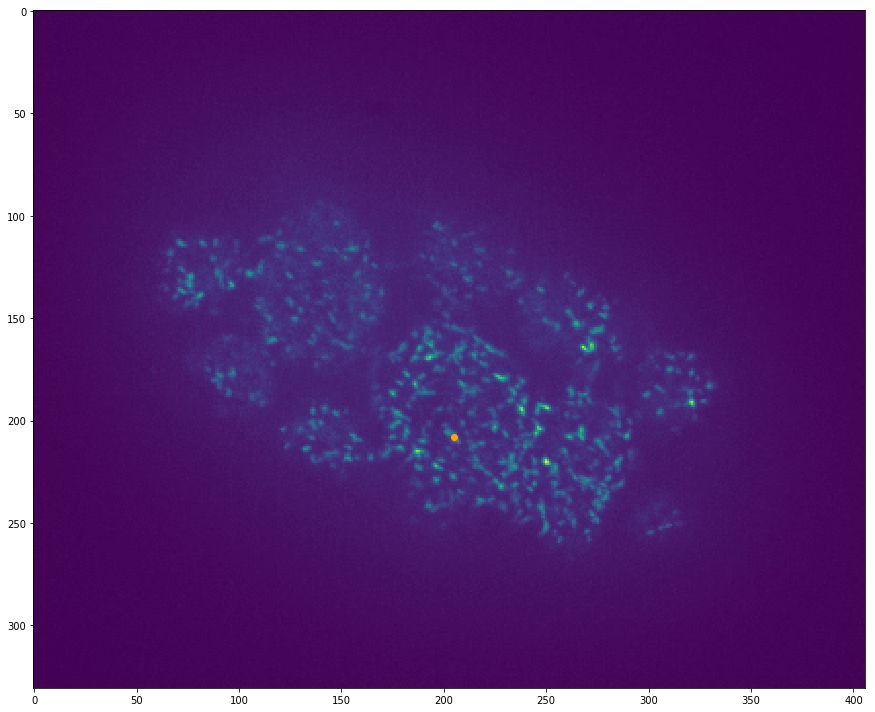

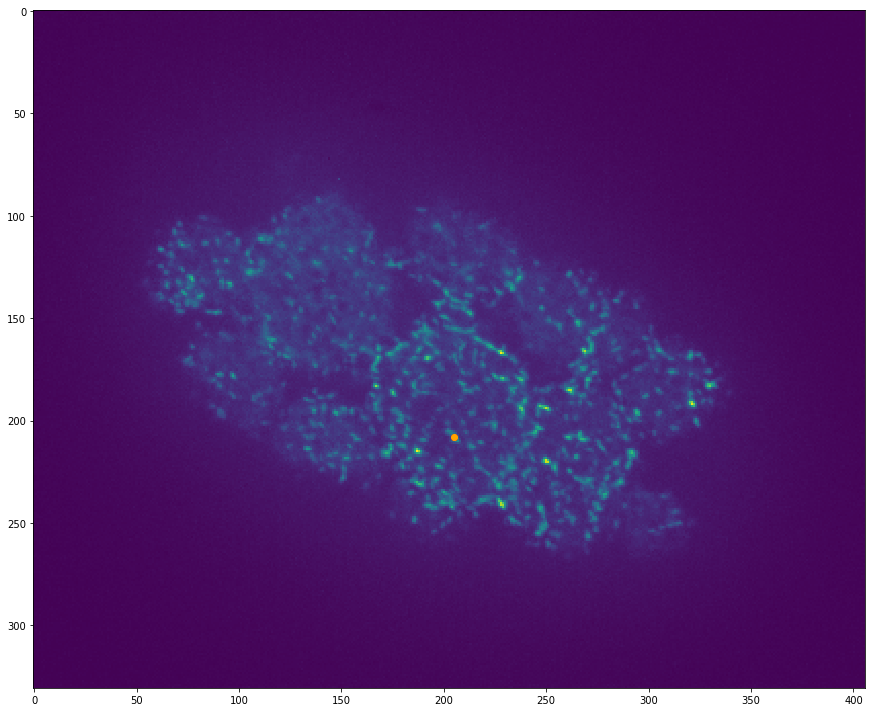

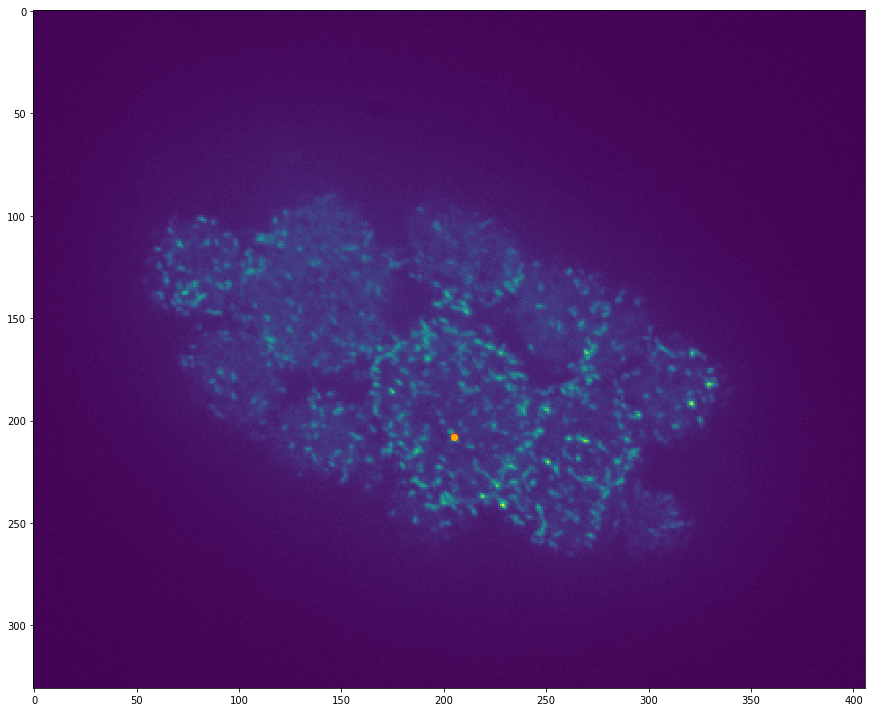

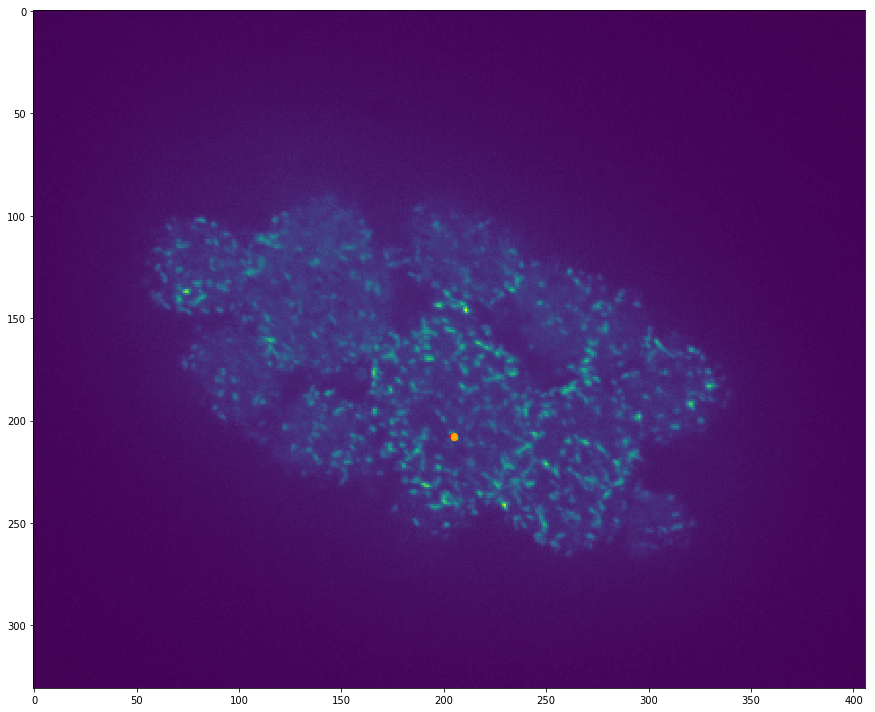

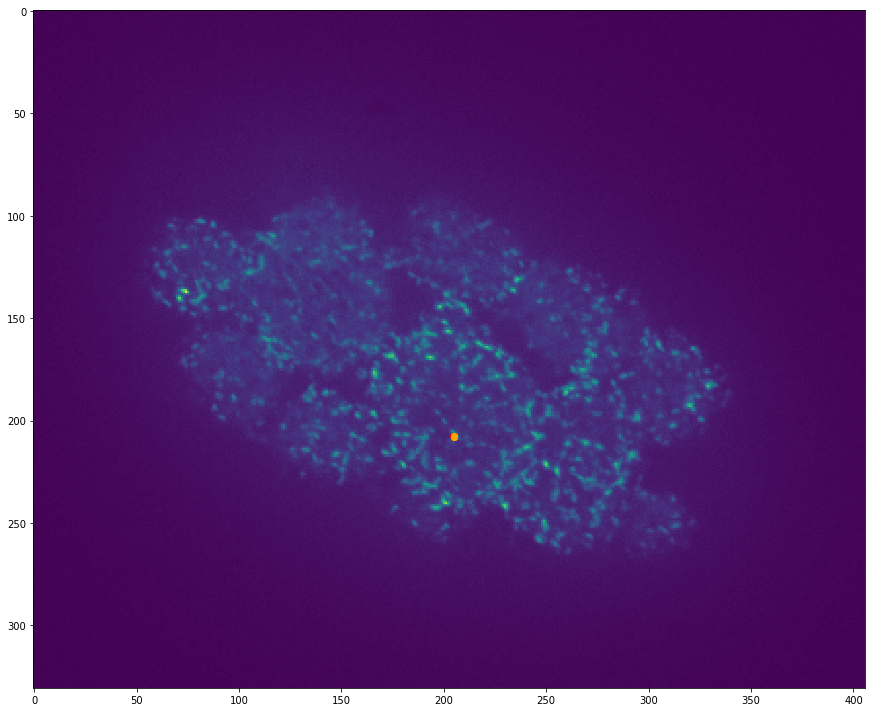

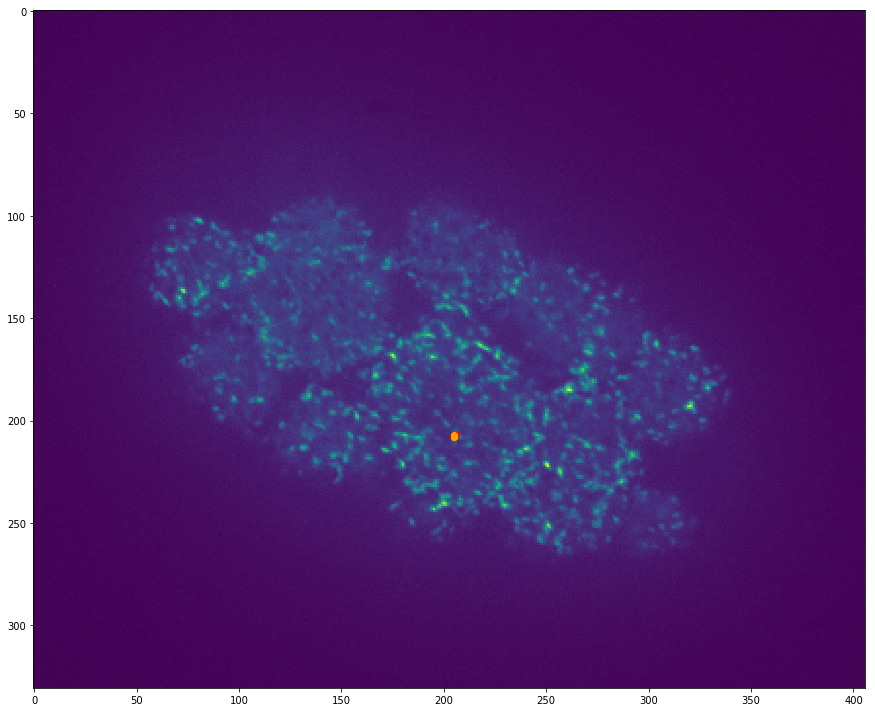

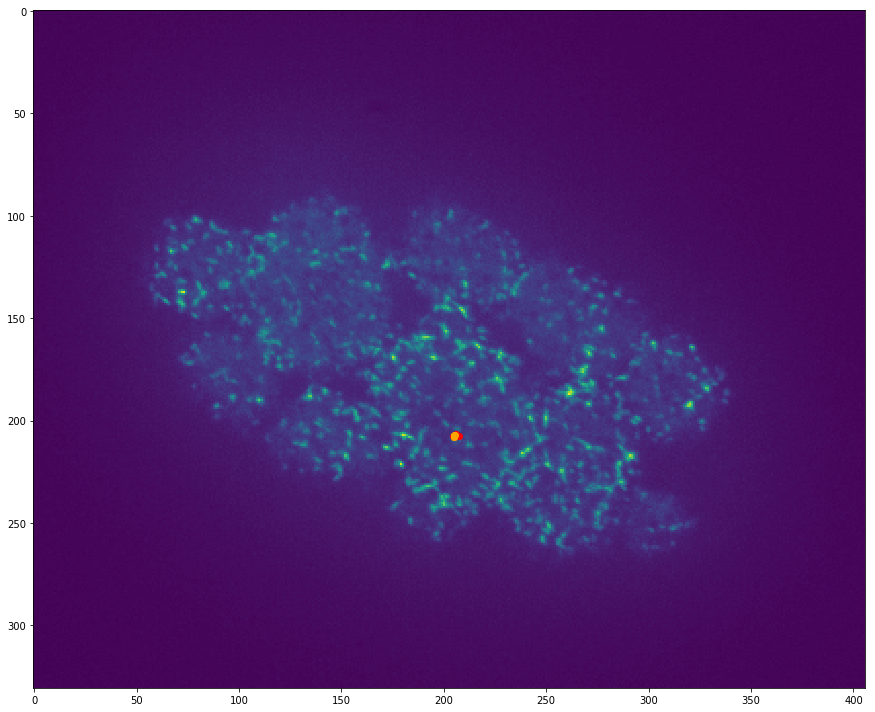

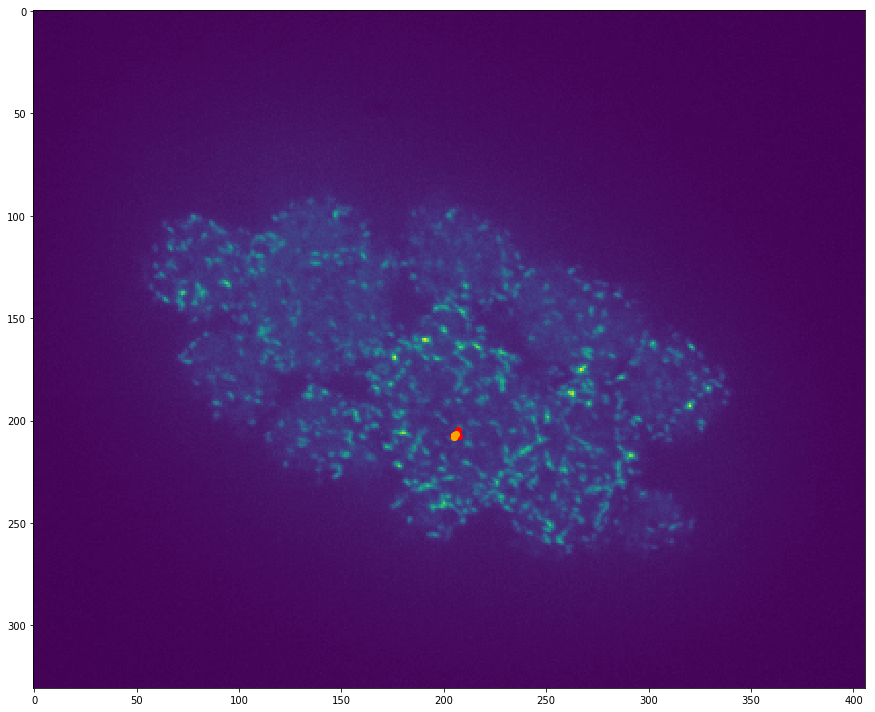

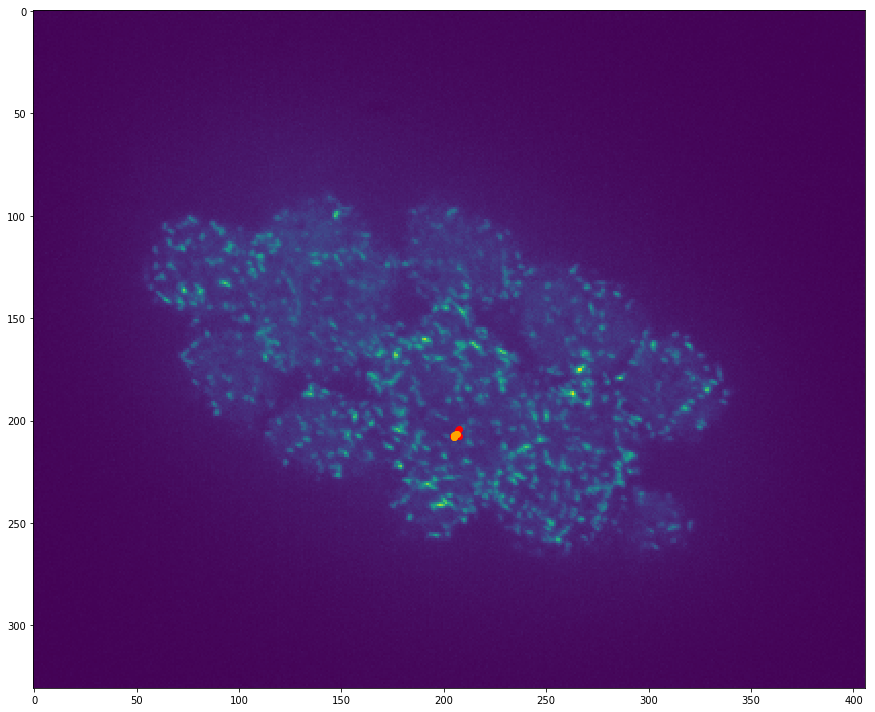

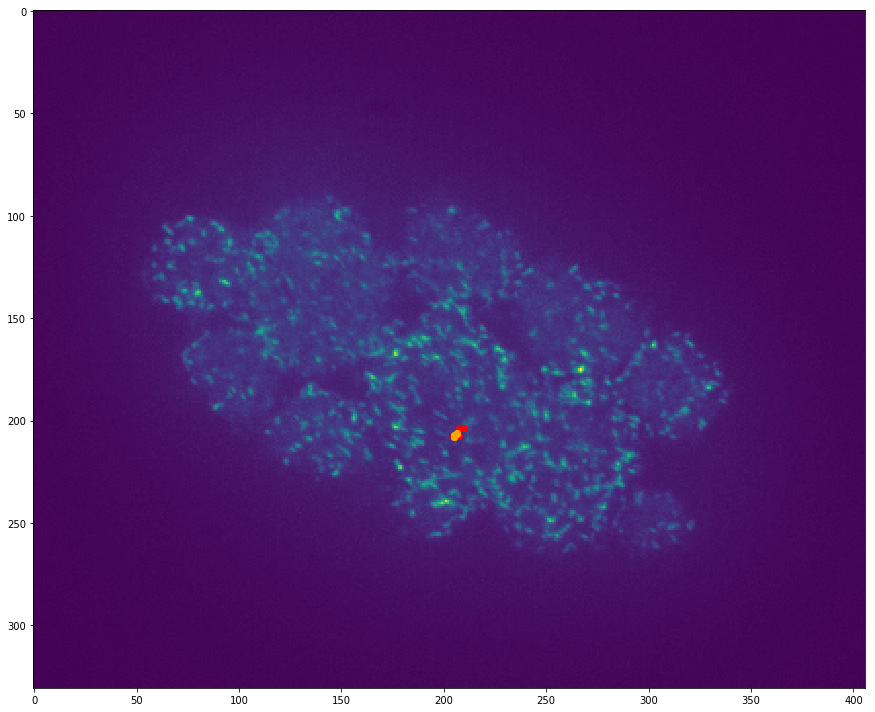

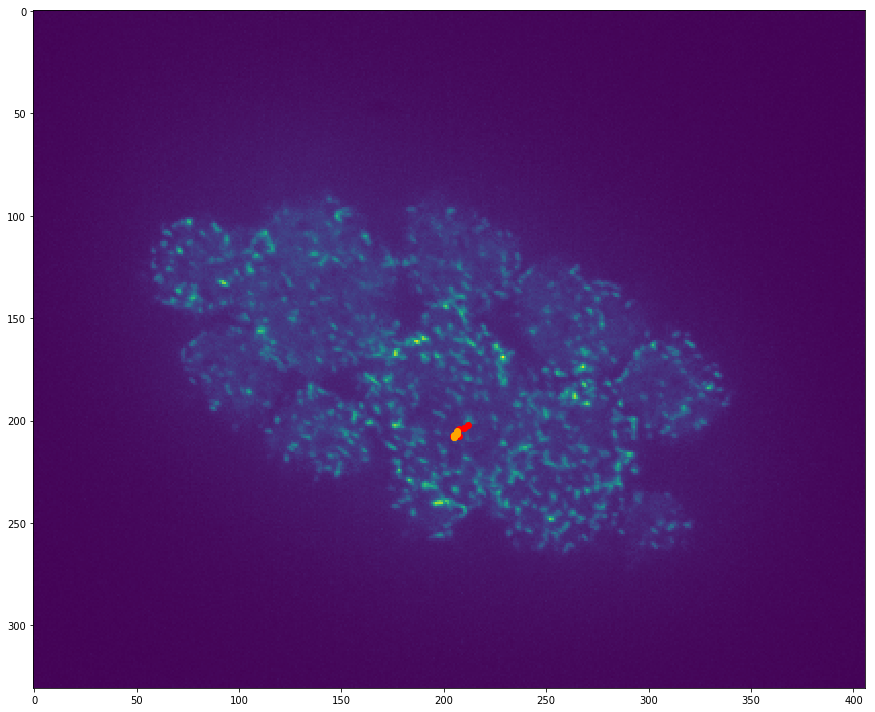

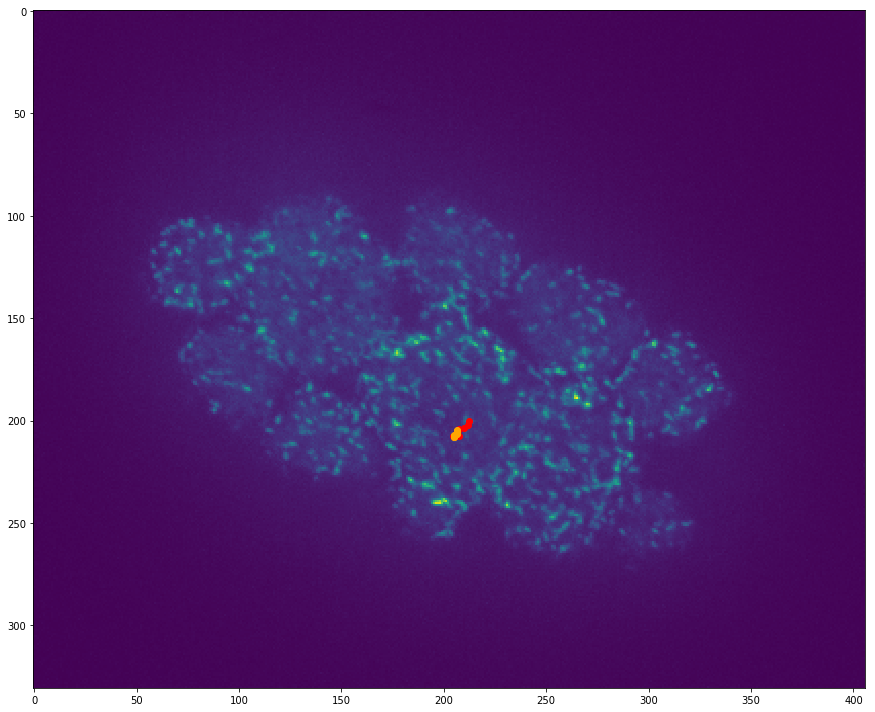

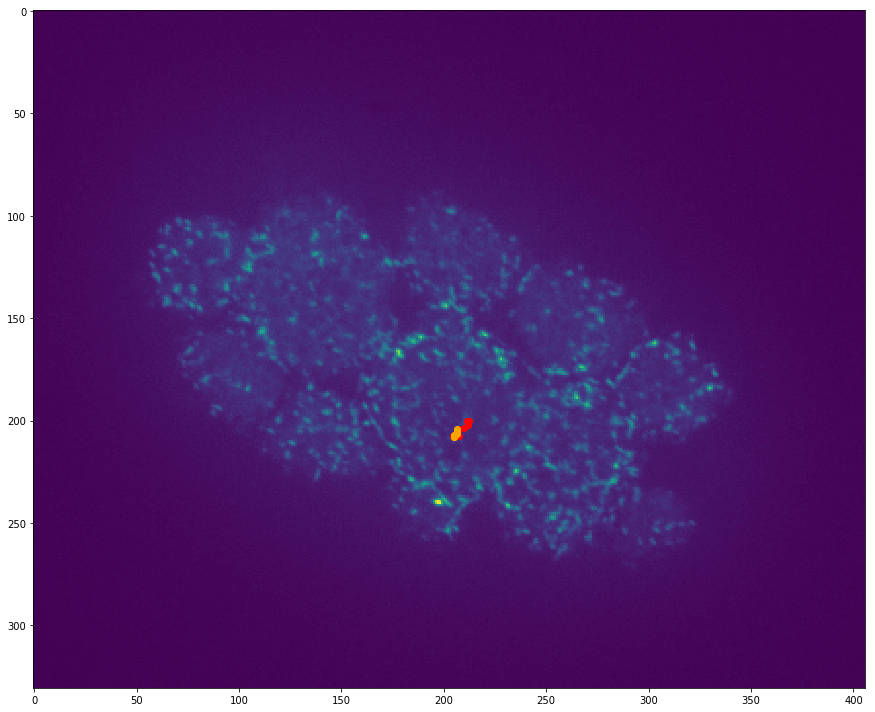

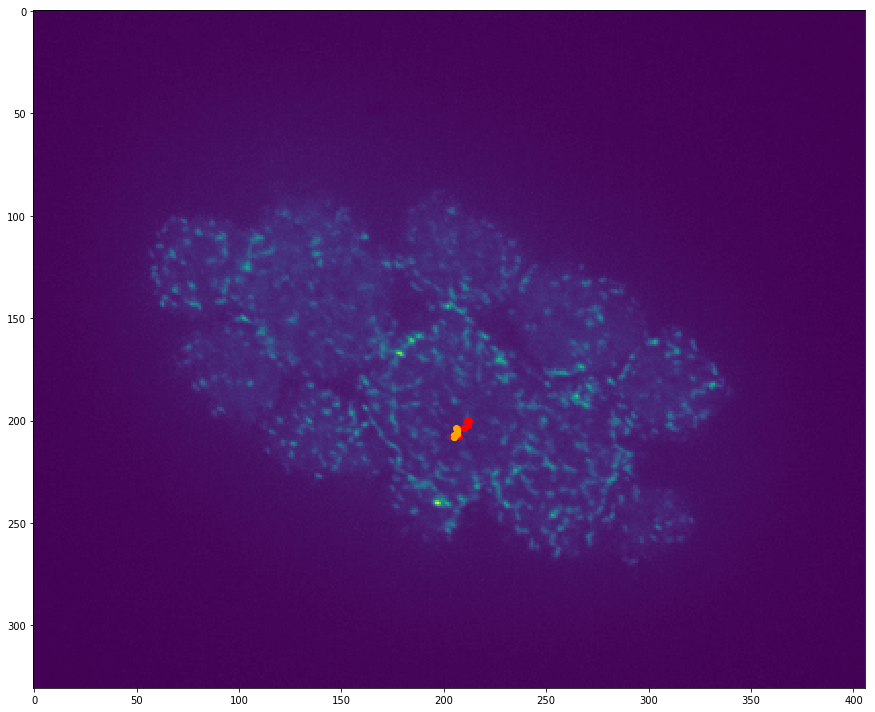

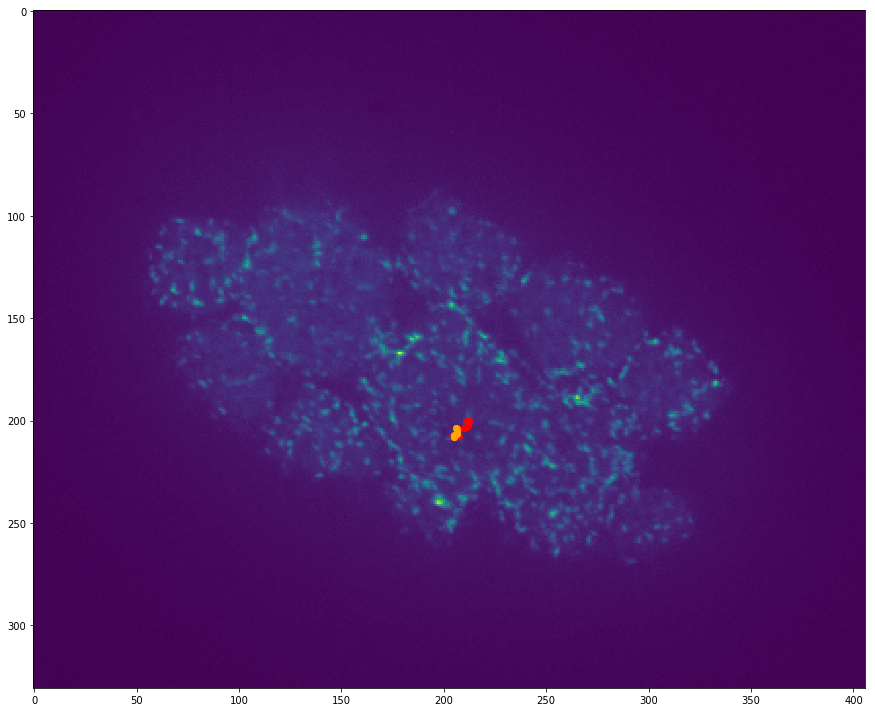

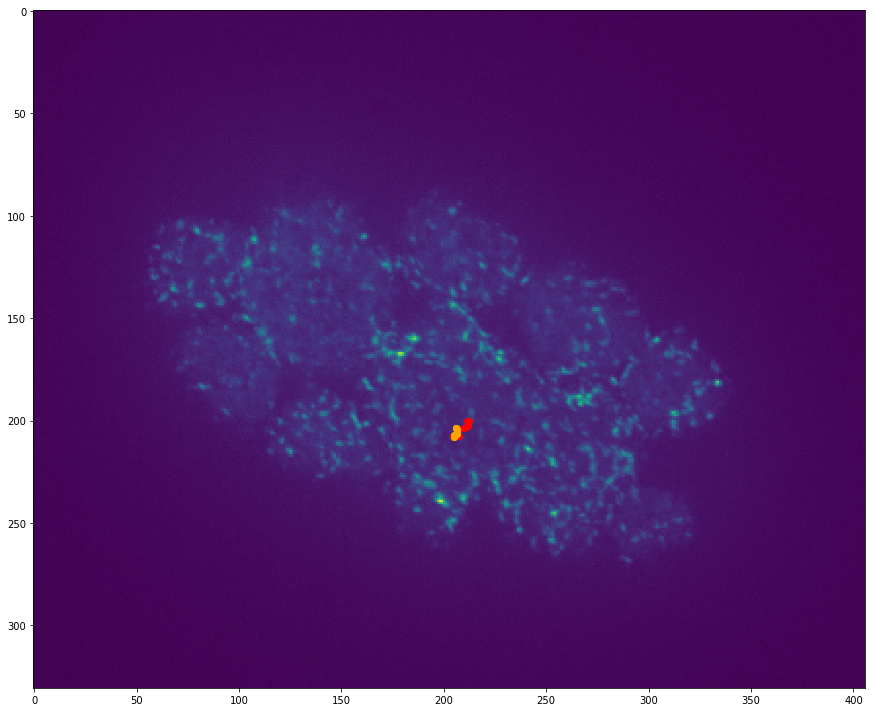

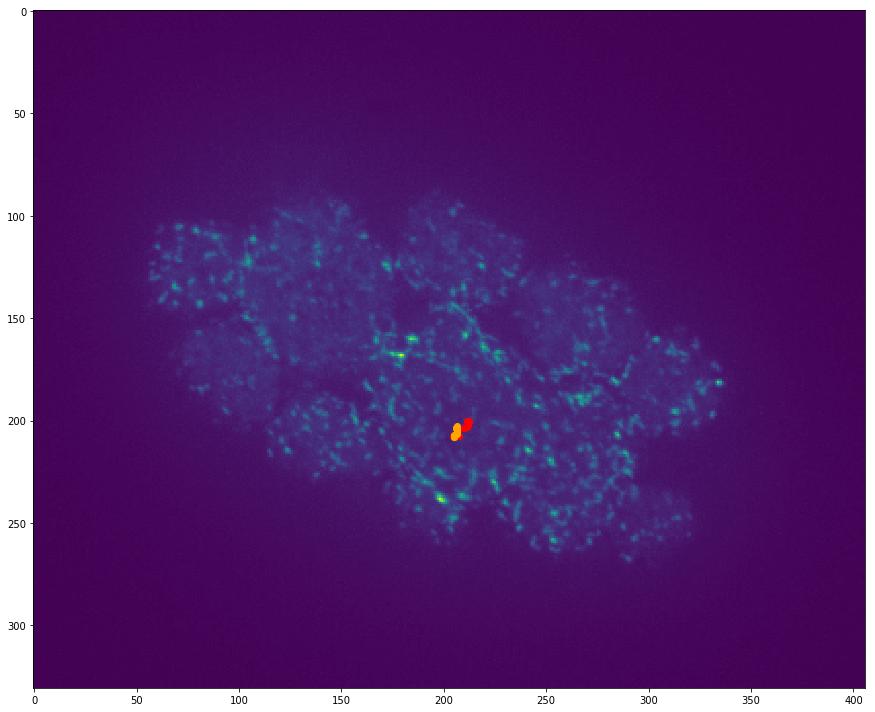

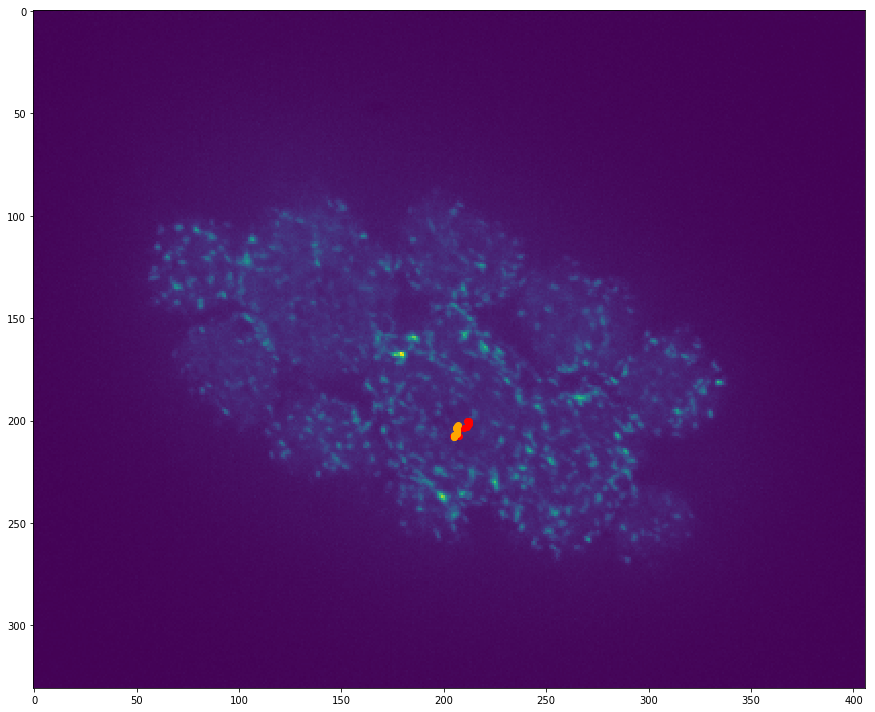

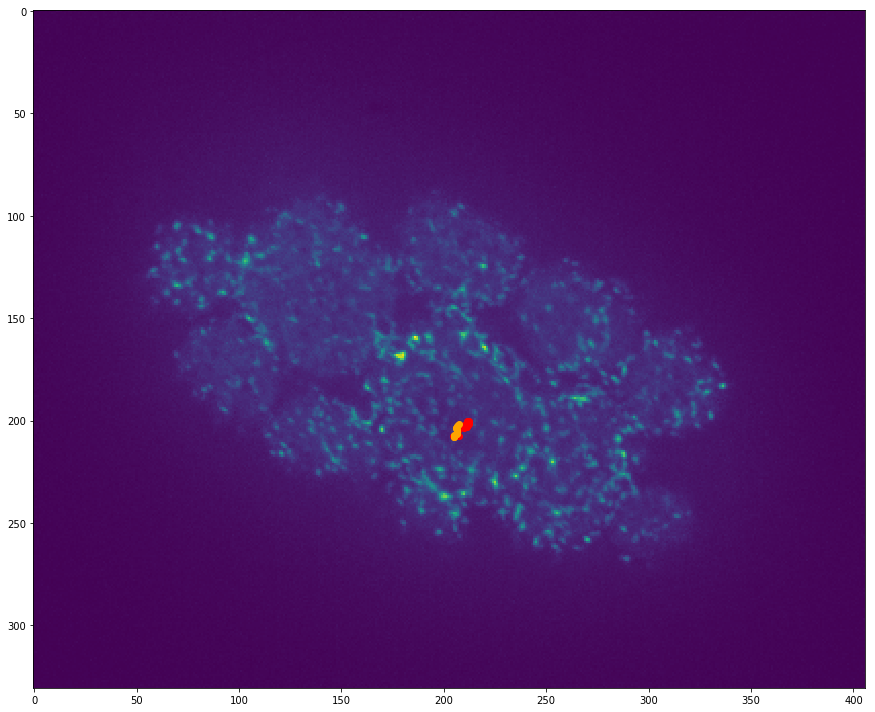

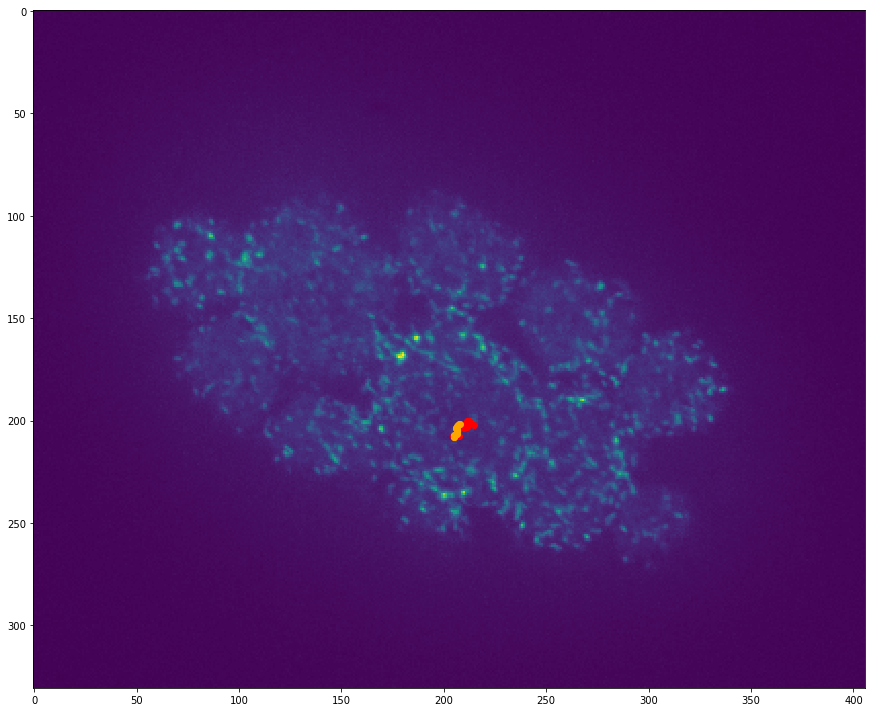

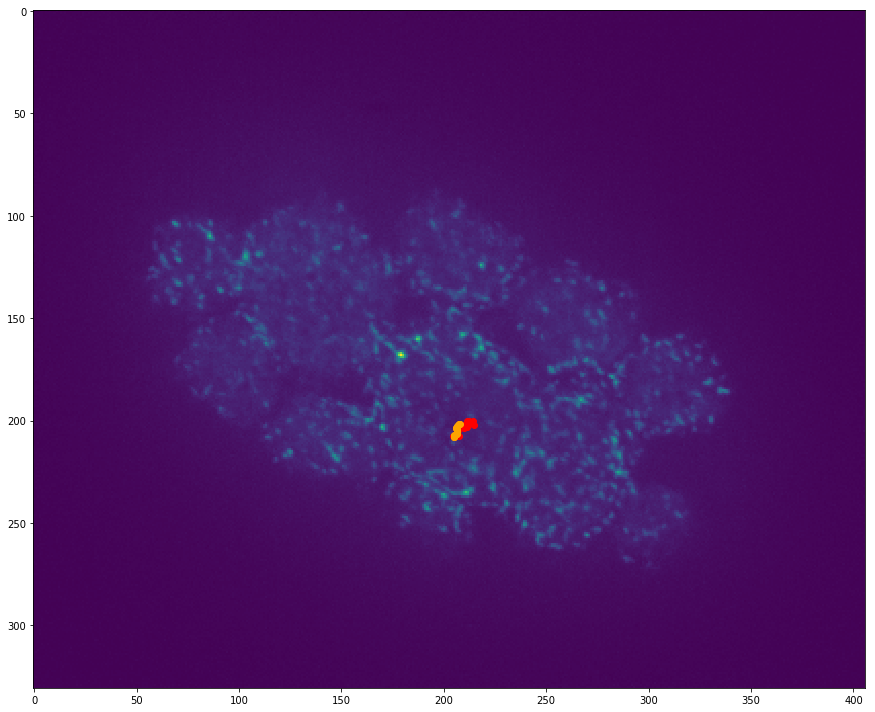

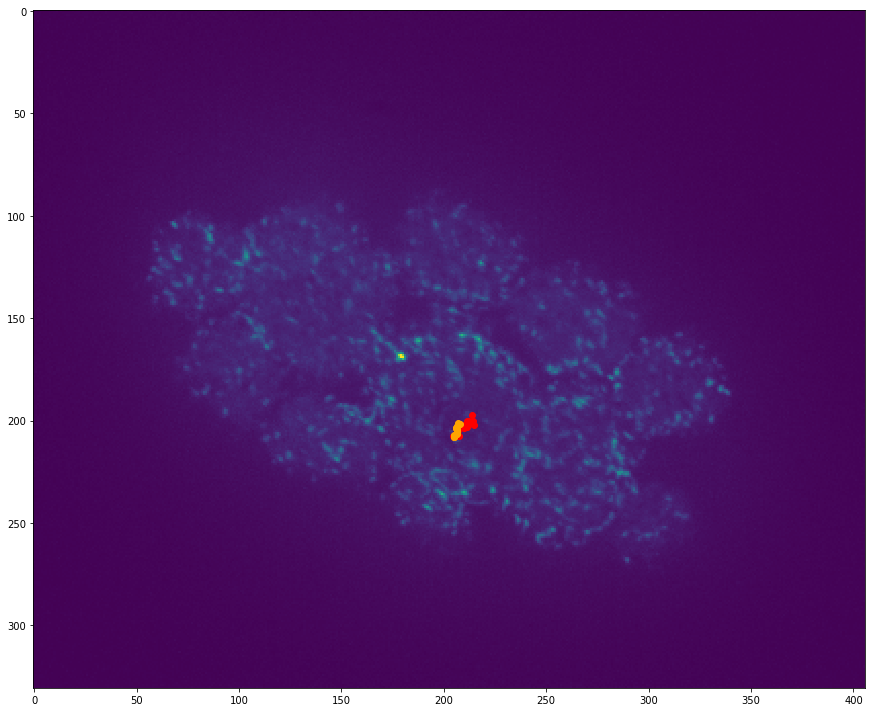

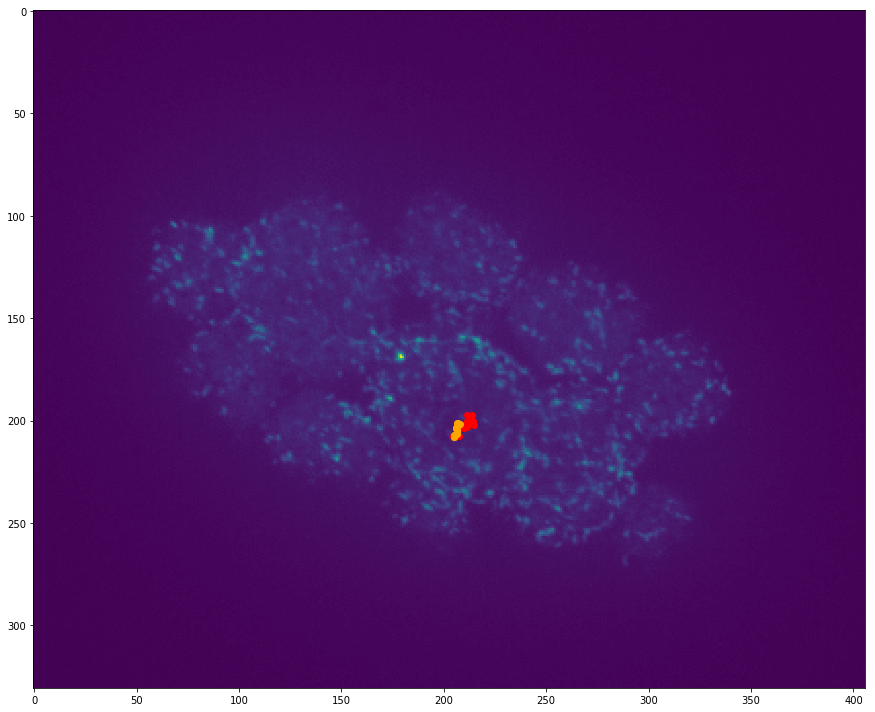

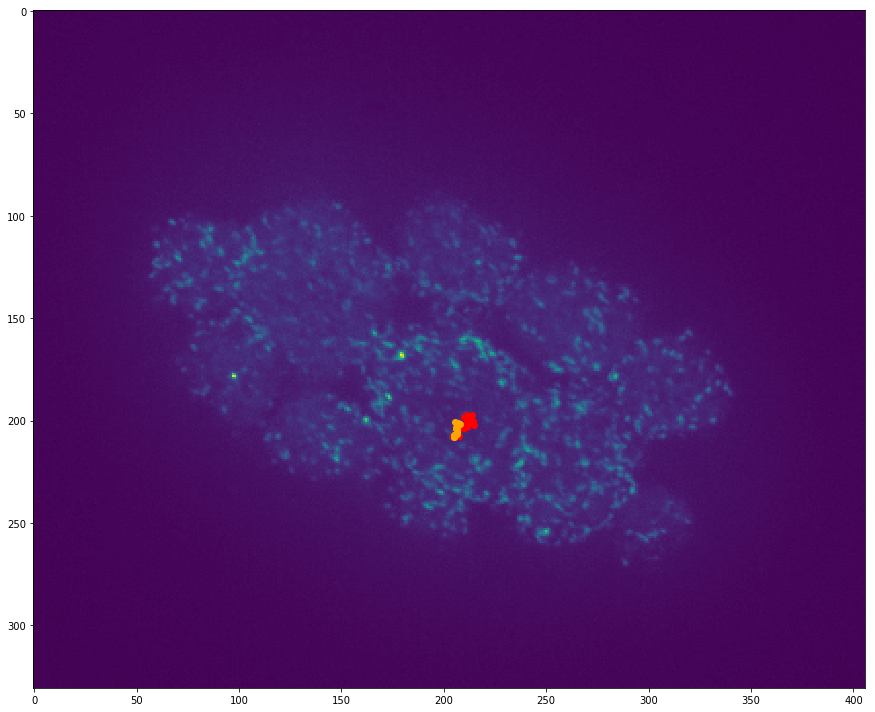

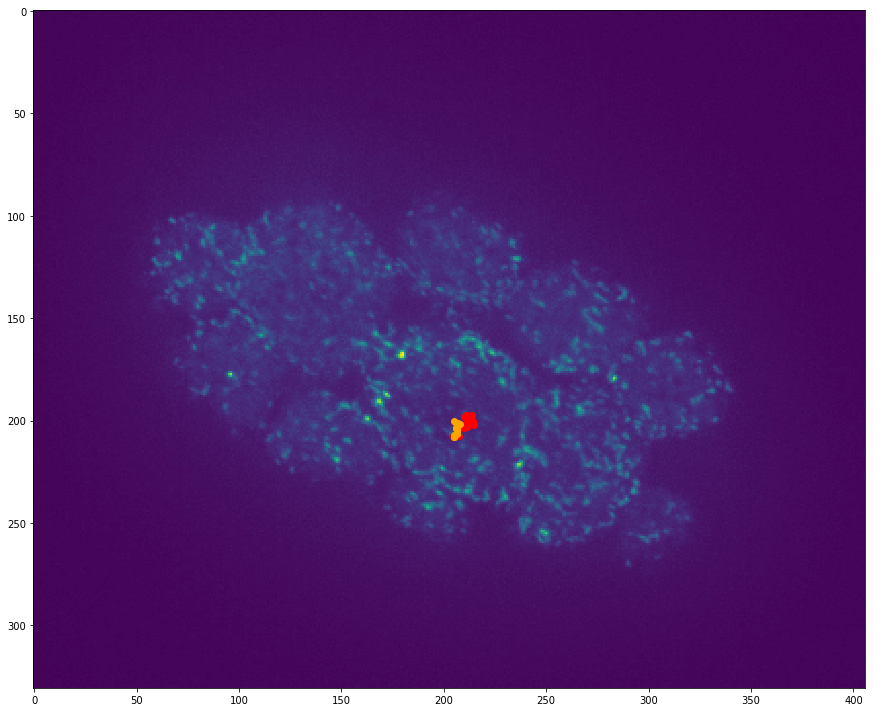

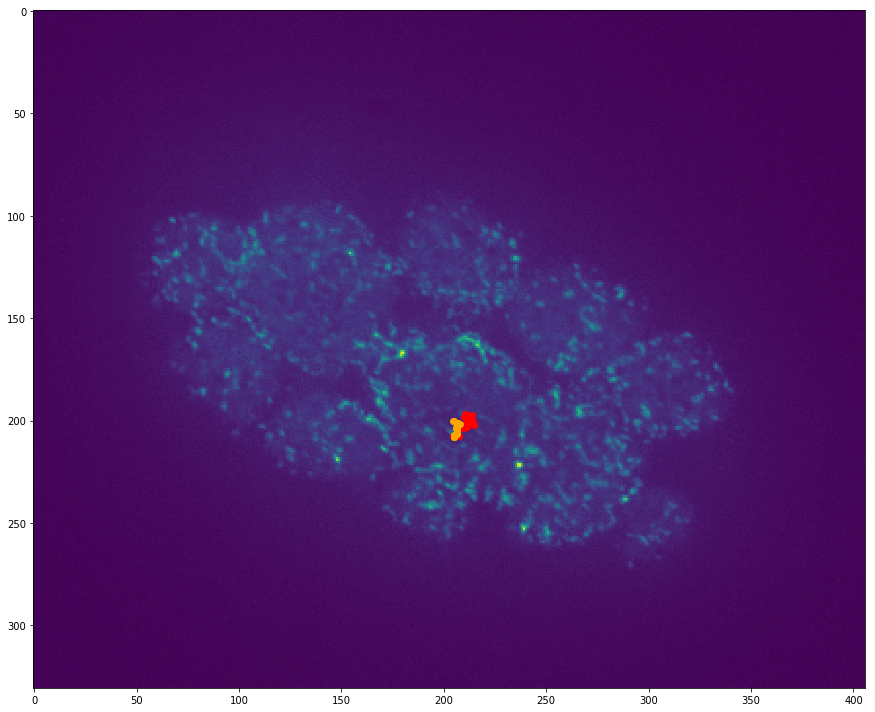

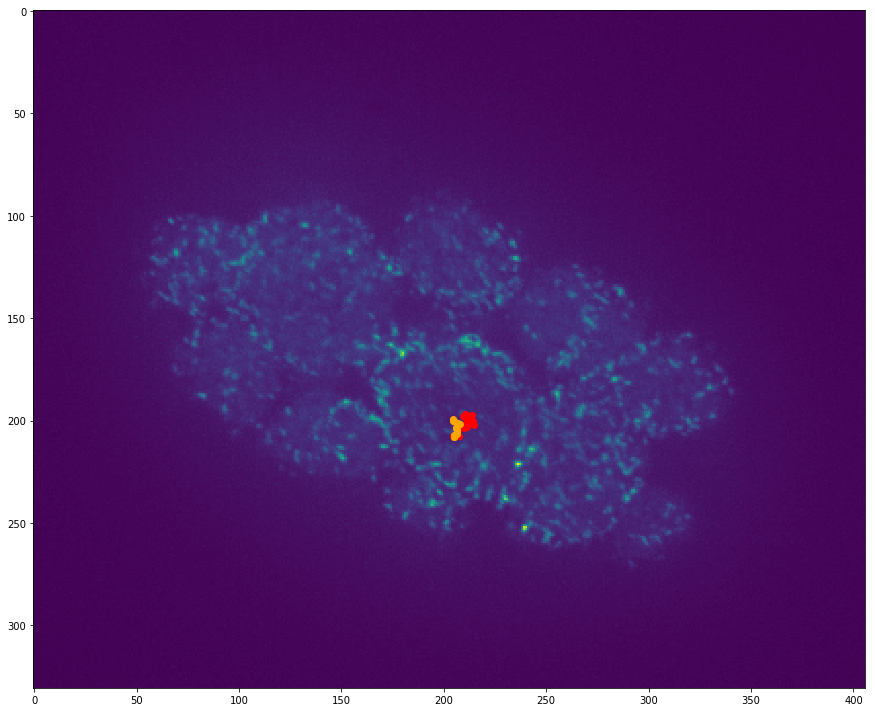

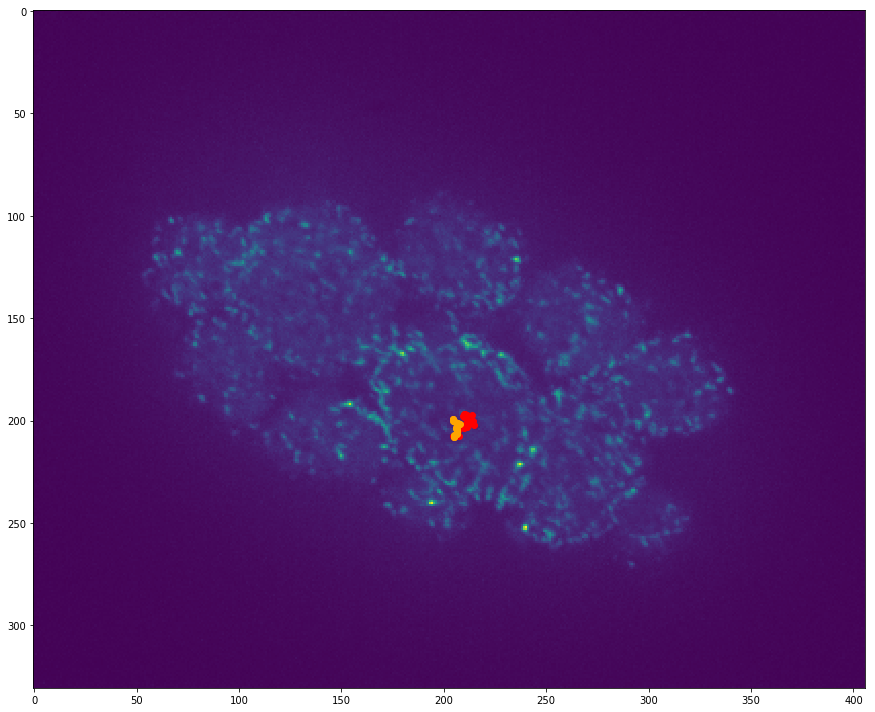

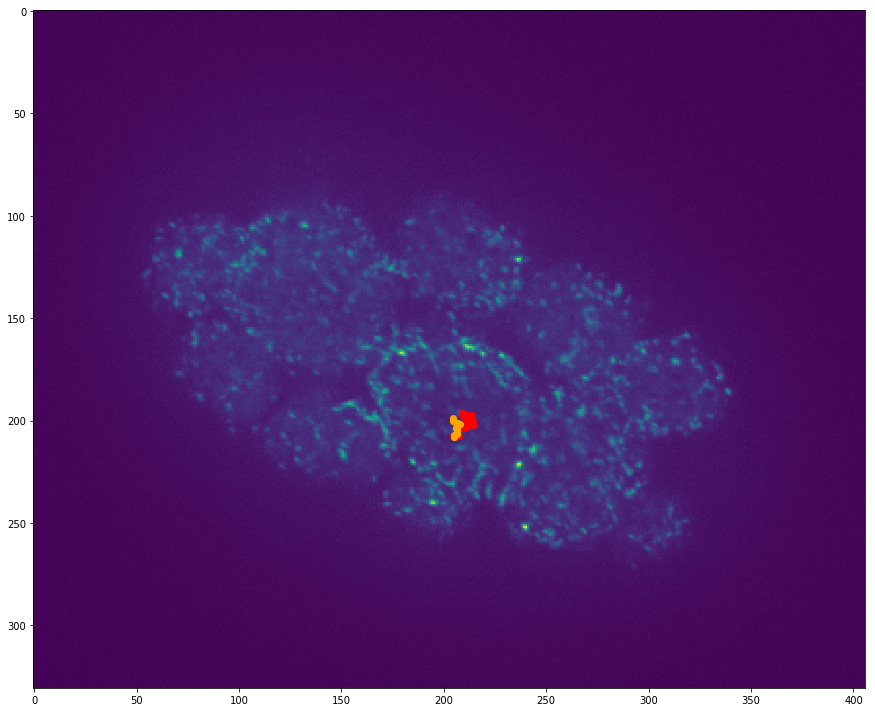

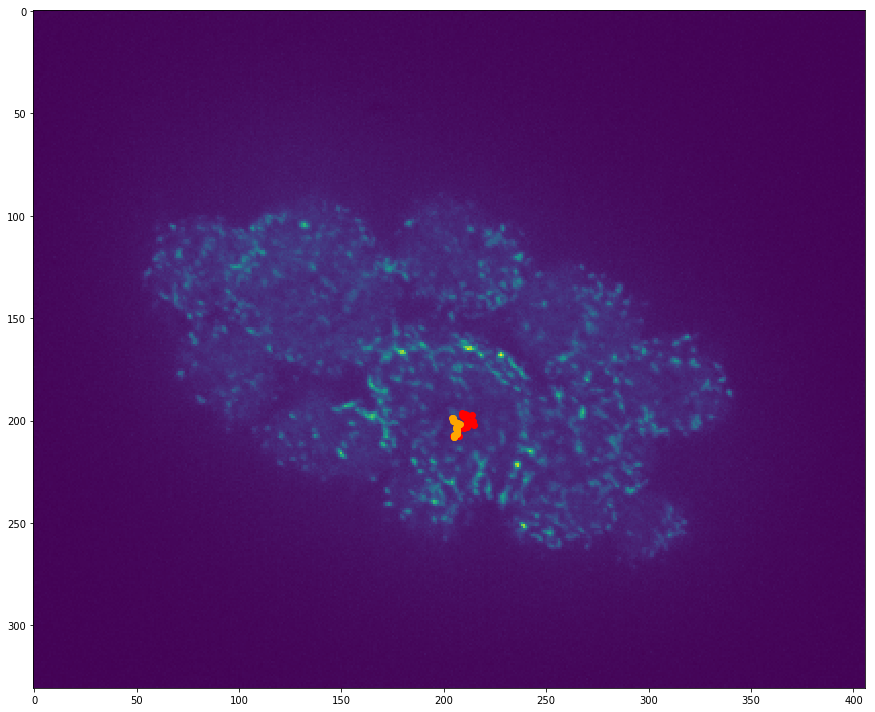

In [15]:
for frame in range(frame_from, frame_to, 1):
    fig = plt.figure()  
    if (frame == 0):
        print(frame)
        plt.plot(manual_track_list_x[0],manual_track_list_y[0],'o',color='red')
        plt.plot(computed_track_list_x[0],computed_track_list_y[0],'o',color='orange')
        plt.imshow(myosin_channel[frame])   

        #fig.savefig('tracks'+str(frame)+'.png',dpi =300)
        #io.imsave('/Users/prakash/Desktop/FlowTracks/tracks'+str(frame)+'.tif', myosin_channel[frame])
        fig.tight_layout()
        
    if ((frame - alpha) >= 0):
        
        plt.plot(manual_track_list_x[frame-alpha:frame],manual_track_list_y[frame-alpha:frame],'o',color='red')
        plt.plot(computed_track_list_x[frame-alpha:frame],computed_track_list_y[frame-alpha:frame],'o',color='orange')
        plt.imshow(myosin_channel[frame])   

        #fig.savefig('/Users/prakash/Desktop/FlowTracks/tracks'+str(frame)+'.png',dpi =300)
        #io.imsave('/Users/prakash/Desktop/FlowTracks/tracks'+str(frame)+'.tif', myosin_channel[frame])
        fig.tight_layout()
        
    else:
        plt.plot(manual_track_list_x[:frame],manual_track_list_y[:frame],'o',color='red')
        plt.plot(computed_track_list_x[:frame],computed_track_list_y[:frame],'o',color='orange')
        plt.imshow(myosin_channel[frame])   

        #fig.savefig('/Users/prakash/Desktop/FlowTracks/tracks'+str(frame)+'.png',dpi =300)
        #io.imsave('/Users/prakash/Desktop/FlowTracks/tracks'+str(frame)+'.tif', myosin_channel[frame])
        fig.tight_layout()

In [13]:
(205,208,0,17)
(169,194,0,30)
(227,205,0,30)
(187,176,0,30)
(179,228,0,30)
(186,212,0,30)
(165,272,0,30)#Good upto 22/23
(205,208,0,30)

(205, 208, 0, 30)